### Web Scraping for Patent Claims Extraction

In [1]:
# Importing the required libraries.

import requests
import bs4
import pandas as pd

In [2]:
# Rolls-Royce Nuclear Reactor Patents.

patents = ['US20220230768A1', 'US20200027593A1', 'US20130329846A1', 'US20200243208A1', 'US5045274A']

In [3]:
# Generating the patent URLs.

text= ""
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    print(url)

https://patents.google.com/patent/US20220230768A1
https://patents.google.com/patent/US20200027593A1
https://patents.google.com/patent/US20130329846A1
https://patents.google.com/patent/US20200243208A1
https://patents.google.com/patent/US5045274A


In [4]:
# Web Scraping to obtain HTML tag class claims for each URL.

text= ""
claims = []
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    request_result = requests.get( url )
    soup = bs4.BeautifulSoup(request_result.text, "html.parser")
    temp = soup.find( "div" , class_='claims' ).text
    claims.append(temp)
    print(temp)


 
 1. A pressure-containing silo for one or more components on a primary coolant circuit of a nuclear power plant having a nuclear reactor containing fuel assemblies which are cooled by pressurised coolant circulating around the primary coolant circuit, the silo defining a release space which, in the event of a loss-of-coolant accident releasing the pressurised coolant from the one or more components contained therein, receives and contains the released coolant;
wherein the silo is formed from plural, substantially identical, stacked and joined modular units, each modular unit having:
a concrete body,
a metal liner which lines a surface of the concrete body, and which, when the units are stacked and joined, is sealed edge-to-edge with the metal liners of neighbouring units to form an inward-facing, pressure-containing skin surrounding the release space, and
plural conduits which, when the units are stacked, align with the conduits of neighbouring units to receive elongate tensioning m


 
 1. A nuclear power plant comprising a nuclear reactor,
the nuclear reactor comprising reactor fuel elements, the reactor fuel elements being arranged between a first height and a second height above the first height, a reactor vessel surrounding the nuclear reactor and a primary shield surrounding the reactor vessel, the primary shield at least forming a ring around the reactor vessel, the primary shield comprising a base portion, an intermediate portion and a top portion, the base portion, the intermediate portion and the top portion each extending continuously circumferentially around the reactor vessel, the base portion of the primary shield having an upper height at or below the first height and the base portion comprising concrete, the top portion of the primary shield having a lower height at or above the second height and the top portion comprising concrete, the intermediate portion of the primary shield being arranged vertically between the base portion and the top portion,


We claim:
 
 1. A circulating-fuel nuclear reactor comprising:
a reactor core chamber having an inlet and an outlet for fluid fuel; a heat exchanger configured to receive fluid fuel from the reactor core chamber via the outlet, to transfer heat from the fluid fuel, and to return the fluid fuel to the reactor core chamber via the inlet; a flow regulator operable to vary an operational flow rate of fluid fuel through the heat exchanger; and a control module configured to cause the flow regulator to vary the operational flow rate of fluid fuel through the heat exchanger to maintain an operational temperature of the fluid fuel within a predetermined range. 

  
 2. The circulating-fuel nuclear reactor according to claim 1, wherein the operational temperature of the fluid fuel is dependent on reaction conditions in the reactor core chamber, wherein the circulating-fuel nuclear reactor (1) further comprises a sensor module operable to measure a parameter indicative of reaction conditions in

In [5]:
len(patents)

5

In [6]:
len(claims)

5

In [7]:
# Constructing a DataFrame having Patent Numbers and their respective extracted Patent Claims.

patdict = {'patnum':patents,'claims':claims}
patent_df = pd.DataFrame(patdict)
patent_df

,patnum,claims
0,US20220230768A1,\n \n 1. A pressure-containing silo for one or...
1,US20200027593A1,\n \n 1. A nuclear power plant comprising a nu...
2,US20130329846A1,\n \n 1. A rotary actuator comprising:\na driv...
3,US20200243208A1,\nWe claim:\n \n 1. A circulating-fuel nuclear...
4,US5045274A,\nI claim:\n \n1. A pressurized water cooled n...


### Text Cleaning of Extracted Patent Claims

In [8]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
# Creating a list of the raw patent claims.

patent_claims = patent_df
claims_list = patent_claims['claims'].tolist()
claims_list

['\n \n 1. A pressure-containing silo for one or more components on a primary coolant circuit of a nuclear power plant having a nuclear reactor containing fuel assemblies which are cooled by pressurised coolant circulating around the primary coolant circuit, the silo defining a release space which, in the event of a loss-of-coolant accident releasing the pressurised coolant from the one or more components contained therein, receives and contains the released coolant;\nwherein the silo is formed from plural, substantially identical, stacked and joined modular units, each modular unit having:\na concrete body,\na metal liner which lines a surface of the concrete body, and which, when the units are stacked and joined, is sealed edge-to-edge with the metal liners of neighbouring units to form an inward-facing, pressure-containing skin surrounding the release space, and\nplural conduits which, when the units are stacked, align with the conduits of neighbouring units to receive elongate tens

In [10]:
# Removing the HTML new line tag and digits.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('\n|\d+', '', claims))
claims_list = temp_claims_list

In [11]:
# Removing commonly occurring phrases that do not contribute to the Knowledge Graph.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('What is claimed is: |The invention claimed is: |We claim: |of claim |in claim |to claim', '', claims))
claims_list = temp_claims_list

In [12]:
# Fixing some commonly occurring phrases.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', wherein|,wherein', 'wherein', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('wherein', '', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', further', 'further', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('anda', 'and a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('comprisinga', 'comprising a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('.  .', '.', claims))
claims_list = temp_claims_list

In [13]:
# Splitting the sentences at full-stop and semi-colon.

temp_claims_list = []
for claims in claims_list:
  temp_claims_list.append(re.split(r'\.|\;', claims)) 
claims_list = temp_claims_list

In [14]:
# Removing empty strings.

temp_claims_list = []
for i in claims_list:
  for j in i:
    if j != '':
      temp_claims_list.append(j)
claims_list = temp_claims_list

In [15]:
# Obtained list of claims from all patents.

claims_list

['  ',
 ' A pressure-containing silo for one or more components on a primary coolant circuit of a nuclear power plant having a nuclear reactor containing fuel assemblies which are cooled by pressurised coolant circulating around the primary coolant circuit, the silo defining a release space which, in the event of a loss-of-coolant accident releasing the pressurised coolant from the one or more components contained therein, receives and contains the released coolant',
 ' the silo is formed from plural, substantially identical, stacked and joined modular units, each modular unit having:a concrete body,a metal liner which lines a surface of the concrete body, and which, when the units are stacked and joined, is sealed edge-to-edge with the metal liners of neighbouring units to form an inward-facing, pressure-containing skin surrounding the release space, andplural conduits which, when the units are stacked, align with the conduits of neighbouring units to receive elongate tensioning membe

### Extraction of Phrases from Complex Claims

In [ ]:
# The code is sourced from: https://github.com/flairNLP.

In [16]:
# Importing the required libraries.


from flair.data import Sentence
from flair.models import SequenceTagger

In [17]:
# Sequence Tagging for meaningful phrases.

ent_tags = []
ent_texts = []

tagger = SequenceTagger.load("flair/chunk-english")
for claim in claims_list:
  sentence = Sentence(claim)
  tagger.predict(sentence)
  for entity in sentence.get_spans('np'):
    ent_tags.append(entity.tag)
    ent_texts.append(entity.text)

C:\Users\Madhu\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2022-10-16 15:12:04,518 loading file C:\Users\Madhu\.flair\models\chunk-english\5b53097d6763734ee8ace8de92db67a1ee2528d5df9c6d20ec8e3e6f6470b423.d81b7fd7a38422f2dbf40f6449b1c63d5ae5b959863aa0c2c1ce9116902e8b22
2022-10-16 15:12:05,404 SequenceTagger predicts: Dictionary with 45 tags: <unk>, O, B-NP, E-NP, I-NP, S-PP, S-VP, S-SBAR, S-ADVP, S-NP, S-ADJP, B-VP, E-VP, B-PP, E-PP, I-VP, S-PRT, B-ADVP, E-ADVP, B-ADJP, E-ADJP, B-CONJP, I-CONJP, E-CONJP, I-ADJP, B-SBAR, E-SBAR, S-INTJ, I-ADVP, I-PP, B-UCP, I-UCP, E-UCP, S-LST, B-PRT, I-PRT, E-PRT, S-CONJP, B-INTJ, E-INTJ, I-INTJ, B-LST, E-LST, <START>, <STOP>


In [18]:
# Dictionary of entities and their sequence tags.

def test(keys, values):
  return dict(zip(keys, values))

ent_dict =  test(ent_texts, ent_tags)
print(ent_dict)

{'A pressure-containing silo': 'NP', 'for': 'PP', 'one or more components': 'NP', 'on': 'PP', 'a primary coolant circuit': 'NP', 'of': 'PP', 'a nuclear power plant': 'NP', 'having': 'VP', 'a nuclear reactor': 'NP', 'containing': 'VP', 'fuel assemblies': 'NP', 'which': 'NP', 'are cooled': 'VP', 'by': 'PP', 'pressurised coolant': 'NP', 'circulating': 'VP', 'around': 'PP', 'the primary coolant circuit': 'NP', 'the silo': 'NP', 'defining': 'VP', 'a release space': 'NP', 'in': 'PP', 'the event': 'NP', 'a loss-of-coolant accident': 'NP', 'releasing': 'VP', 'the pressurised coolant': 'NP', 'from': 'PP', 'the one or more components': 'NP', 'contained': 'VP', 'therein': 'ADVP', 'receives and contains': 'VP', 'the released coolant': 'NP', 'is formed': 'VP', 'plural , substantially identical , stacked and joined modular units': 'NP', 'each modular unit': 'NP', 'a concrete body,a metal liner': 'NP', 'lines': 'VP', 'a surface': 'NP', 'the concrete body': 'NP', 'when': 'ADVP', 'the units': 'NP', 'ar

In [19]:
# Rules for extracting the valid phrases.

phrases = []
curr_phrase = ""
prev_tag = ""

for key in ent_dict:
  if curr_phrase == "":
    if ent_dict[key] == "NP":
      curr_phrase = curr_phrase + key
      prev_tag = ent_dict[key]
      continue
    else:
      prev_tag = ent_dict[key]
      continue
  elif curr_phrase != "":
    if ent_dict[key] == "NP":
      if (prev_tag == "VP") or (prev_tag == "PP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        phrases.append(curr_phrase)
        curr_phrase = ""
        continue
    elif ent_dict[key] == "VP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue
    elif ent_dict[key] == "PP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue

In [20]:
# Extracted phrases from all the patent claims.

phrases

['A pressure-containing silo for one or more components',
 'a primary coolant circuit of a nuclear power plant',
 'a nuclear reactor containing fuel assemblies',
 'which are cooled pressurised coolant',
 'the primary coolant circuit defining a release space',
 'the event releasing the pressurised coolant',
 'the one or more components contained the released coolant',
 'plural , substantially identical , stacked and joined modular units lines a surface',
 'the concrete body are stacked the metal liners',
 'neighbouring units to form an inward-facing , pressure-containing skin',
 'the release space align the conduits',
 'elongate tensioning members post-stressing the concrete',
 'the bodies has alignment fixtures',
 'corresponding alignment fixtures to ensure each other',
 'alignment markings extend three orthogonal directions',
 'the aligned conduits is a cylindrical space',
 'two are the cylinder axis',
 'the third orthogonal direction extends its upper end',
 'a domed head is secured 

In [21]:
# Creating the class "Nuclear Reactor" for BERT Classification.

label = ['Nuclear Reactor'] * len(phrases)

In [22]:
# Creating the DataFrame for the class "Nuclear Reactor" for BERT Classification.

NR_patdict = {'label':label,'text':phrases}
NR_patent_df = pd.DataFrame(NR_patdict)
NR_patent_df

,label,text
0,Nuclear Reactor,A pressure-containing silo for one or more com...
1,Nuclear Reactor,a primary coolant circuit of a nuclear power p...
2,Nuclear Reactor,a nuclear reactor containing fuel assemblies
3,Nuclear Reactor,which are cooled pressurised coolant
4,Nuclear Reactor,the primary coolant circuit defining a release...
...,...,...
91,Nuclear Reactor,respect or a lower region
92,Nuclear Reactor,an integral self pressurized water cooled nucl...
93,Nuclear Reactor,the pressurizer being dimensioned the integral...
94,Nuclear Reactor,two abnormal positions has been displaced the ...


In [23]:
# Saving the DataFrame in a CSV file.

NR_patent_df.to_csv('NR_patent_df.csv', index=False)

### Building the Entity-Relation Table

In [24]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
# Function to extract the entities and relations from phrases using POS Tagging.

def get_ent_rel(sent):
  node_pos = ["NOUN", "PROPN", "ADJ"]
  edge_pos = ["VERB", "AUX", "ADV", "ADP"]
  ignore_pos = ["CCONJ", "DET", "INTJ", "NUM", "PUNCT", "SYM"]
  
  ent1 = ""
  ent2 = ""
  rel = ""

  for tok in nlp(sent):
    if tok.pos_ in ignore_pos:
      continue
    if tok.pos_ in node_pos:
      if (ent1 == "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + " " + tok.text
    if tok.pos_ in edge_pos:
      if (ent1 != "") and (ent2 == "") and (rel == ""):
        rel = rel + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel != ""):
        rel = rel + " " + tok.text
    if tok.pos_ in node_pos:
      if (ent1 != "") and (ent2 == "") and (rel != ""):
        ent2 = ent2 + tok.text
      elif (ent1 != "") and (ent2 != "") and (rel != ""):
        ent2 = ent2 + " " + tok.text
  return (ent1, ent2, rel)

In [26]:
# List of sources, targets and their connecting edges (relations).

phrase_ent1 = []
phrase_ent2 = []
phrase_rel = []

for phrase in phrases:
  ent1, ent2, rel = get_ent_rel(phrase)
  phrase_ent1.append(ent1)
  phrase_ent2.append(ent2)
  phrase_rel.append(rel)

In [ ]:
# The code is sourced from: https://spacy.io/universe/project/contextualSpellCheck.

In [27]:
# Applying Contextual Spell Check to avoid misspelled entities and relations.

import contextualSpellCheck
contextualSpellCheck.add_to_pipe(nlp)

for ent1 in phrase_ent1:
    doc = nlp(ent1)
    ent1 = doc._.outcome_spellCheck

for ent2 in phrase_ent2:
    doc = nlp(ent2)
    ent2 = doc._.outcome_spellCheck

for rel in phrase_rel:
    doc = nlp(rel)
    rel = doc._.outcome_spellCheck

In [28]:
# Constructing the Entity-Relation Table.

phrase_df = pd.DataFrame(
    { 'source': phrase_ent1,
      'target': phrase_ent2,
      'edge': phrase_rel
    }
)

phrase_df.drop(phrase_df[phrase_df.target == ''].index, inplace=True)
phrase_df

,source,target,edge
0,pressure,silo more components,containing
1,primary coolant circuit,nuclear power plant,of
2,nuclear reactor,fuel assemblies,containing
4,primary coolant circuit,release space,defining
5,event,coolant,releasing pressurised
...,...,...,...
90,aperture,angle,is disposed
92,integral self,water nuclear reactor steam space,pressurized
93,pressurizer,integral water nuclear reactor,being dimensioned
94,abnormal positions,lower vessel,has been displaced


In [29]:
# Saving the table in a CSV file.

phrase_df.to_csv('NR_RollsRoyce.csv', index=False)

### Construction of Preliminary Knowledge Graph

In [ ]:
# The code is sourced from: https://www.kaggle.com/code/nageshsingh/build-knowledge-graph-using-python.

In [30]:
# Importing the required libraries.

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

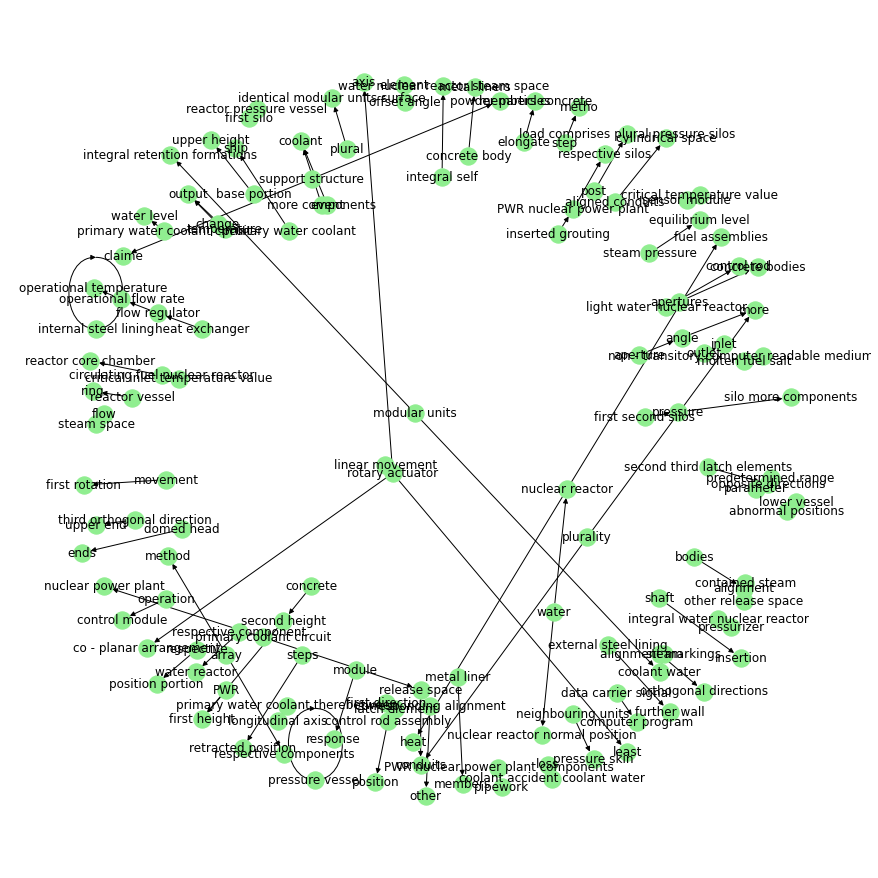

In [31]:
# Construction of Preliminary Knowledge Graph.

G=nx.from_pandas_edgelist(phrase_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='lightgreen', edge_cmap=plt.cm.Greens, pos = pos)
plt.show()